In [1]:
from matplotlib import use
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('ex2data1.txt',names=['exam1_score','exam2_score','admission_status'])
data.head()

,exam1_score,exam2_score,admission_status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
get = data.loc[data['admission_status'] == 1]
notget = data.loc[data['admission_status'] == 0]

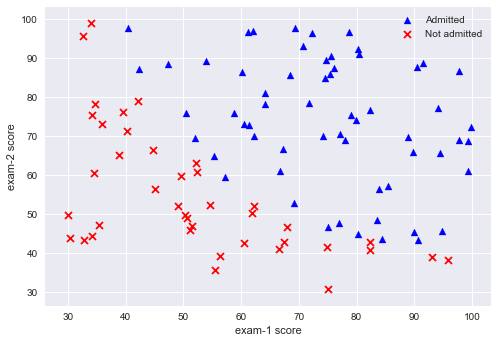

In [4]:
# visalisation

plt.scatter(get['exam1_score'], get['exam2_score'], color='b', marker='^',label='Admitted')
plt.scatter(notget['exam1_score'], notget['exam2_score'], color='r',marker='x',label='Not admitted')
plt.xlabel('exam-1 score')
plt.ylabel('exam-2 score')
plt.legend()
plt.show()

#### Sigmoid function
$$ g(z)=\frac{1}{1+e^{−z}} $$

In [5]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

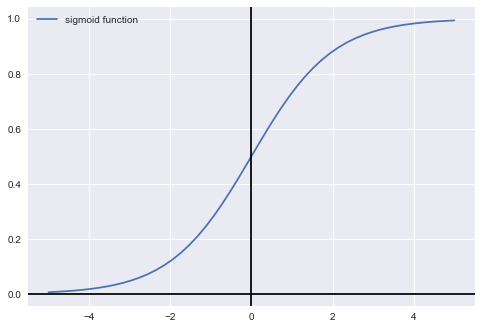

In [6]:
x_ = np.linspace(-5,5) 
plt.plot(x_,sigmoid(x_),label='sigmoid function')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()
plt.show()

In [7]:
x = data.as_matrix(['exam1_score','exam2_score'])
y = data.as_matrix(['admission_status'])
m,n = x.shape

In [8]:
# initialize parameters

initial_theta = np.zeros(n+1)
X = np.concatenate((np.ones((m,1)),x),axis=1)
print "X shape : ",X.shape
print "y shape : ",y.shape
print "theta shape : ",initial_theta.shape
y[:5]

X shape :  (100, 3)
y shape :  (100, 1)
theta shape :  (3,)


array([[0],
       [0],
       [0],
       [1],
       [1]])

In [9]:
def costFunction(theta,X,y):
    
    y = np.squeeze(y)
    h = sigmoid(np.dot(X,theta.T))
    a = np.multiply(y,np.log(h))
    b = (1-y) * (np.log(1-h))
    J =  (a+b).sum() / -m
    return J

In [10]:
print "initial cost :",costFunction(initial_theta,X,y)

initial cost : 0.69314718056


In [11]:
def gradientFunction(theta,X,y):
    m = len(y)
    y = np.squeeze(y)
    h = sigmoid(np.dot(X,theta))
    grad = (1. / m) * np.dot((X.T),(h-y))
    return grad

In [12]:
print "initial grad : ",gradientFunction(initial_theta,X,y)

initial grad :  [ -0.1        -12.00921659 -11.26284221]


In [13]:
res = minimize(costFunction, initial_theta, args=(X,y), method='TNC', jac=gradientFunction, options={'maxiter':1000})


#res = minimize(costFunction, initial_theta, method='TNC',
#               jac=False, args=(X, y), options={'gtol': 1e-3, 'disp': True, 'maxiter': 1000})



theta = res.x
loss = res.fun

In [14]:
print theta
print loss
res

[-25.1613186    0.20623159   0.20147149]
0.203497701589


     fun: 0.20349770158947467
     jac: array([  8.94599100e-09,   8.26923975e-08,   4.73761958e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.1613186 ,   0.20623159,   0.20147149])

In [15]:
x1 = X[:,1:2]
x2 = X[:,2:3]

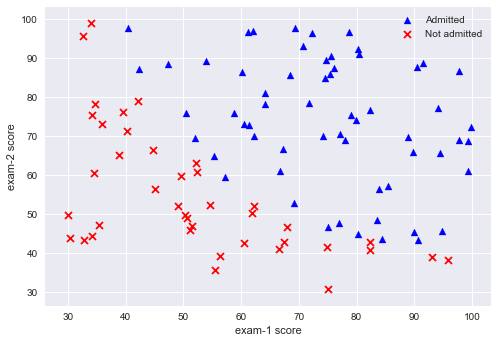

In [16]:
# visalisation

plt.scatter(get['exam1_score'], get['exam2_score'], color='b', marker='^',label='Admitted')
plt.scatter(notget['exam1_score'], notget['exam2_score'], color='r',marker='x',label='Not admitted')
plt.xlabel('exam-1 score')
plt.ylabel('exam-2 score')
plt.legend()
plt.show()